In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from louvain import Louvain
from collections import defaultdict
import time
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
G = nx.Graph()
edges = [(1,2),(1,3),(1,4),(2,4),(3,4),(4,5),(5,6),(5,7),(6,7),(7,8),(4,8),(4,12),(10,12),(10,8),(9,10),(8,9),(11,9),(11,10),(11,12)]
G.add_weighted_edges_from([(i,j,1.0) for i,j in edges])

In [3]:
def get_graphs():
    directory = '../DataSets/reels/'
    graphs = []
    for filename in os.listdir(directory):
        file_path = directory + filename + '/' + filename + '.gml'
        try:
            graph = nx.read_gml(file_path, label='id')
            for u, v, data in graph.edges(data=True):
                data['weight'] = 1
            with open(f'{directory}{filename}/groundTruth.txt', 'r') as file:
                partition = []
                for i, line in enumerate(file.readlines()):
                    partition.append(int(line.strip()))
            assert len(partition) == len(graph.nodes)
            graphs.append((graph, filename, partition))
        except Exception as e:
            print(f"Error loading graph from file {file_path}: {e}")
    return graphs

In [4]:
def load_synth_graphs():
    directory = '../DataSets/synthétiques/test/'
    graphs = []
    for filename in os.listdir(directory):
        path = directory + filename
        G = nx.Graph()
        with open(f'{path}/network.dat', 'r') as f:
            for line in f:
                parts = line.strip().split('\t')
                node1 = int(parts[0])
                node2 = int(parts[1])
                G.add_edge(node1, node2)

        # Read community.dat
        
        real_partition = []
        with open(f'{path}/community.dat', 'r') as f:
            for line in f:
                real_partition.append(int(line.split('\t')[1].strip()))

        for u, v, data in G.edges(data=True):
            data['weight'] = 1

        graphs.append((G, filename, real_partition))


    return graphs

In [5]:
def minimize_duplicates(lst):
    # Create a mapping of unique values to consecutive integers
    value_to_index = {}
    index_counter = 1
    result = []

    for value in lst:
        if value not in value_to_index:
            value_to_index[value] = index_counter
            index_counter += 1
        result.append(value_to_index[value])

    return result


#############################
Performance of algroithm for graph:  test
NMI Score: 1.0
Modularity: 0.4279778393351801
            time  modularity
pass 1  0.000473    0.427978
pass 2  0.000052    0.517734
pass 3  0.000038    0.517734


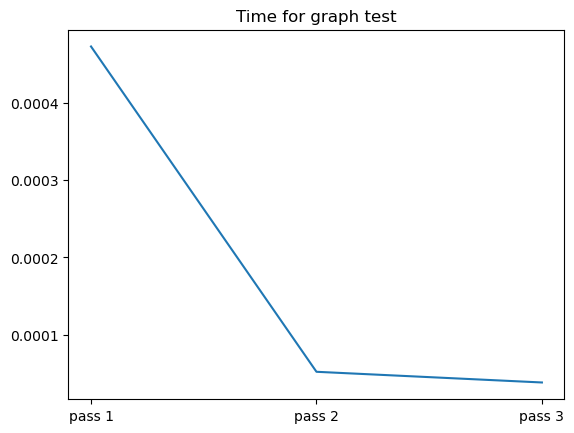




#############################
Performance of algroithm for graph:  dolphins
NMI Score: 0.5162338069720358
Modularity: 0.5188283691309679
            time  modularity
pass 1  0.008962    0.495214
pass 2  0.000410    0.609358
pass 3  0.000093    0.615119
pass 4  0.000089    0.615119


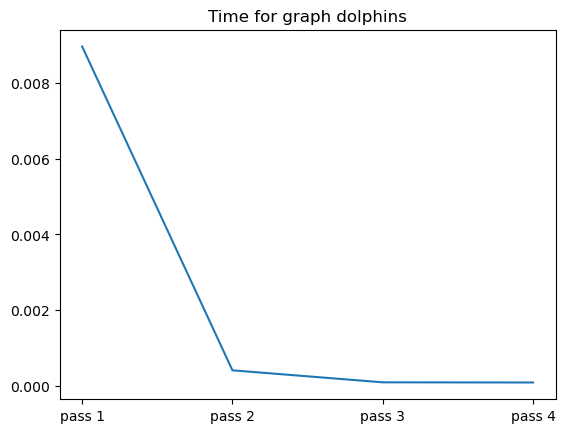




#############################
Performance of algroithm for graph:  karate
NMI Score: 0.5866347600965968
Modularity: 0.41880341880341876
            time  modularity
pass 1  0.004238    0.361358
pass 2  0.000176    0.516519
pass 3  0.000056    0.526694
pass 4  0.000054    0.526694


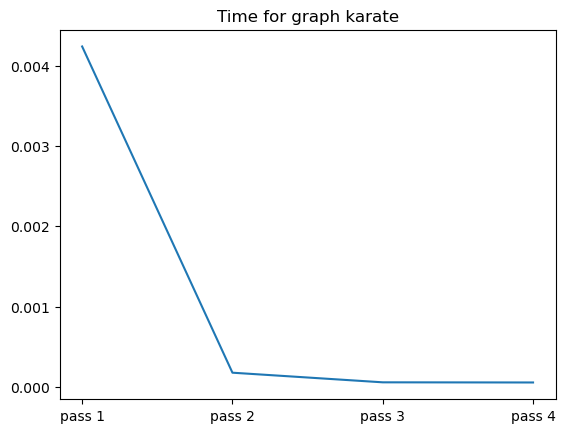




#############################
Performance of algroithm for graph:  football
NMI Score: 0.8903166312052428
Modularity: 0.6045695626834571
            time  modularity
pass 1  0.033134    0.601009
pass 2  0.001233    0.724035
pass 3  0.000464    0.725308
pass 4  0.000469    0.725308


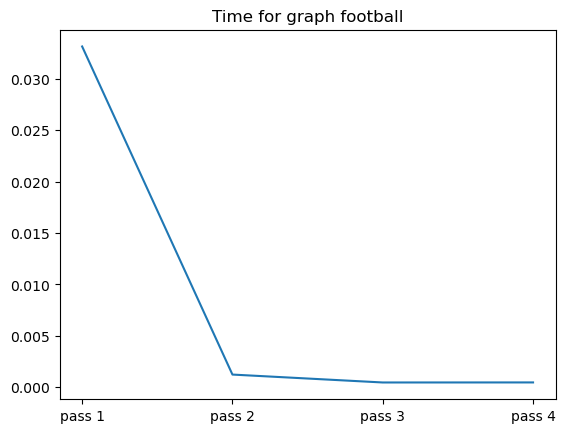




#############################
Performance of algroithm for graph:  polbooks
NMI Score: 0.5121330361945668
Modularity: 0.5204852916223178
            time  modularity
pass 1  0.022658    0.483302
pass 2  0.000302    0.572984
pass 3  0.000073    0.575156
pass 4  0.000068    0.575156


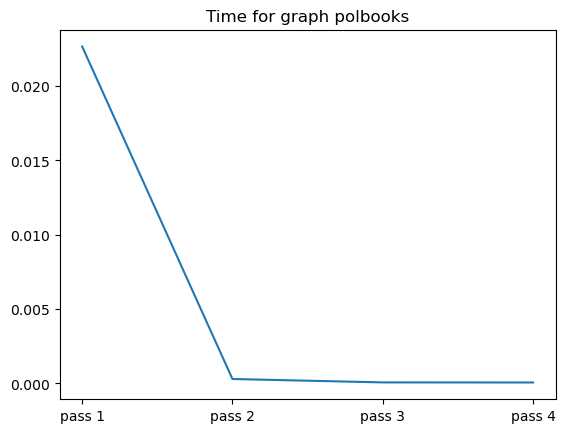




#############################
Performance of algroithm for graph:  0.30
NMI Score: 1.0
Modularity: 0.453125
            time  modularity
pass 1  0.109596    0.453125
pass 2  0.000088    0.575685
pass 3  0.000069    0.575685


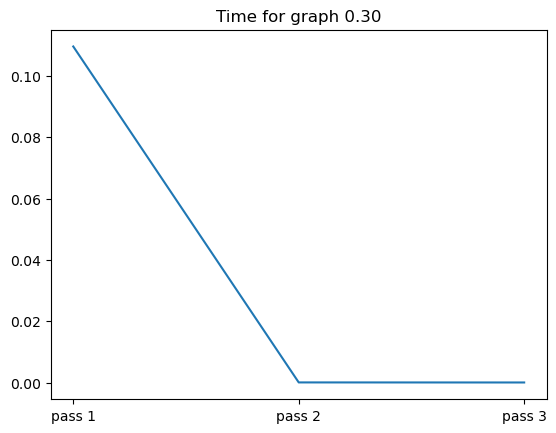




#############################
Performance of algroithm for graph:  0.00
NMI Score: 1.0
Modularity: 0.75
            time  modularity
pass 1  0.036874        0.75
pass 2  0.000040        0.75


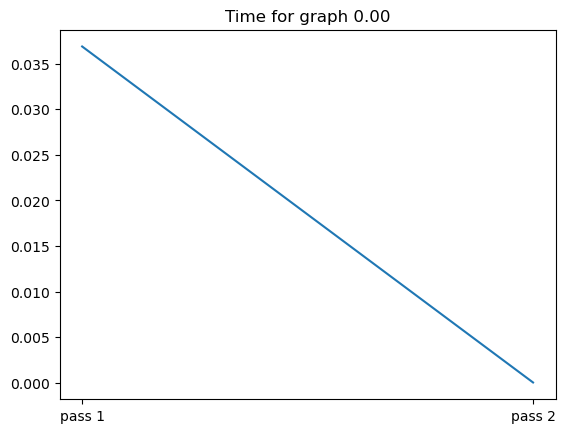




#############################
Performance of algroithm for graph:  0.25
NMI Score: 1.0
Modularity: 0.5
            time  modularity
pass 1  0.105951    0.500000
pass 2  0.000094    0.607143
pass 3  0.000072    0.607143


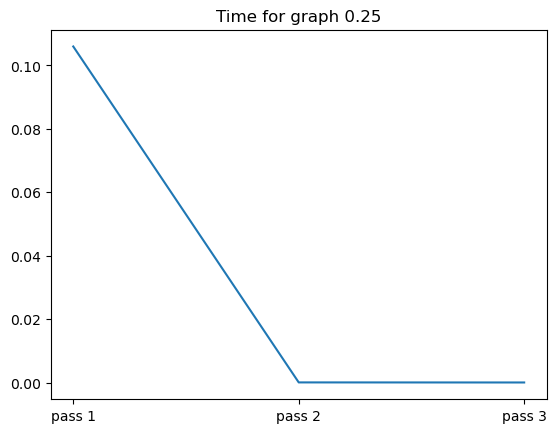




#############################
Performance of algroithm for graph:  0.40
NMI Score: 1.0
Modularity: 0.34765625
            time  modularity
pass 1  0.195787    0.301758
pass 2  0.000351    0.476955
pass 3  0.000072    0.498166
pass 4  0.000068    0.498166


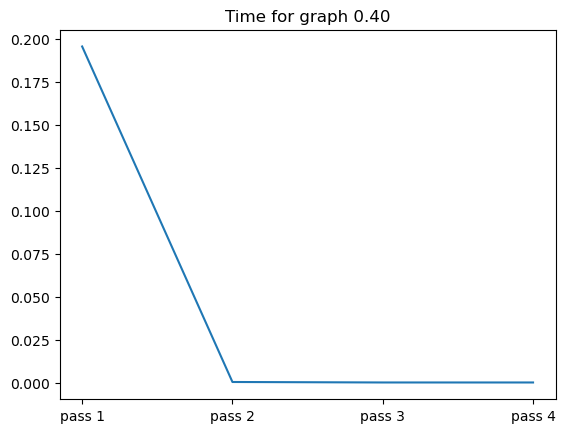




#############################
Performance of algroithm for graph:  0.15
NMI Score: 1.0
Modularity: 0.6015625
            time  modularity
pass 1  0.083068    0.601562
pass 2  0.000093    0.669831
pass 3  0.000073    0.669831


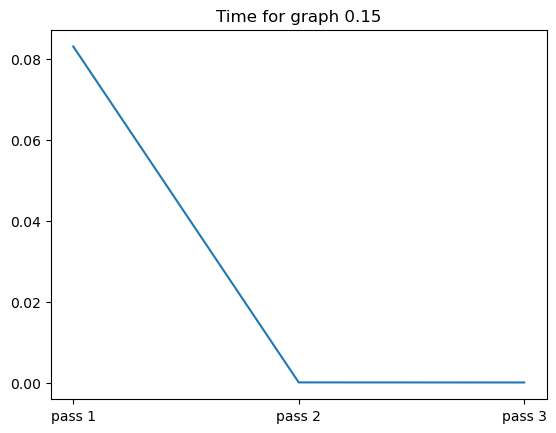




#############################
Performance of algroithm for graph:  0.05
NMI Score: 1.0
Modularity: 0.7001953125
            time  modularity
pass 1  0.052941    0.700195
pass 2  0.000103    0.724460
pass 3  0.000288    0.724460


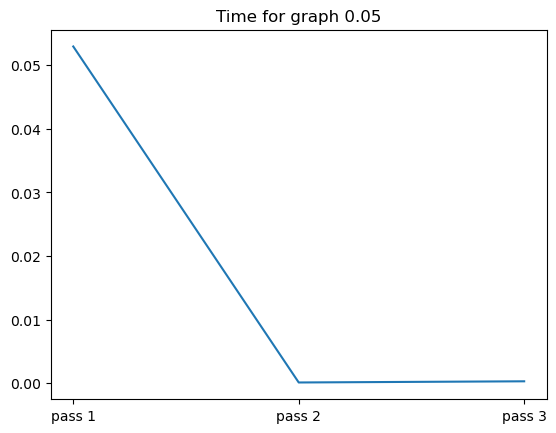




#############################
Performance of algroithm for graph:  0.35
NMI Score: 1.0
Modularity: 0.3984375
            time  modularity
pass 1  0.139371    0.376831
pass 2  0.000214    0.529393
pass 3  0.000069    0.536728
pass 4  0.000064    0.536728


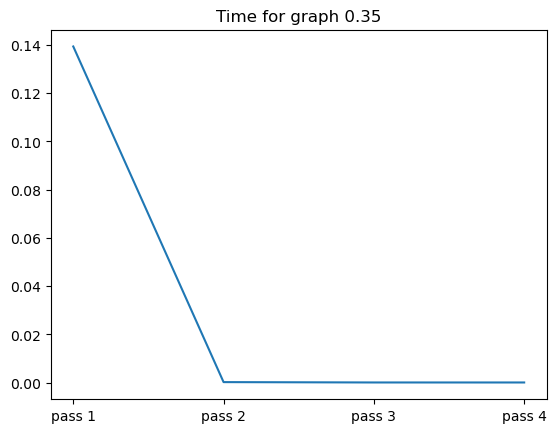




#############################
Performance of algroithm for graph:  0.50
NMI Score: 0.2677899786990027
Modularity: 0.20751953125
            time  modularity
pass 1  0.186752    0.201050
pass 2  0.000977    0.364555
pass 3  0.000172    0.377030
pass 4  0.000158    0.377030


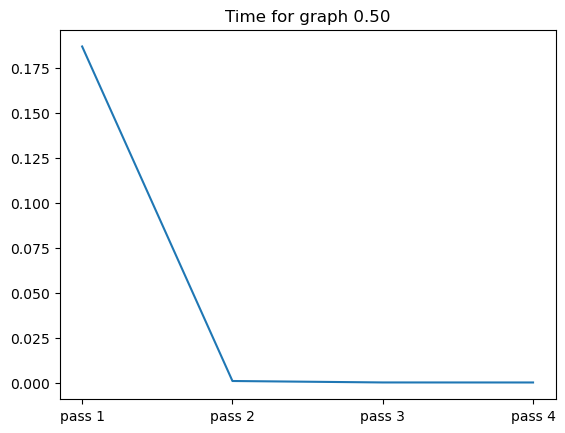




#############################
Performance of algroithm for graph:  0.10
NMI Score: 1.0
Modularity: 0.6484375
            time  modularity
pass 1  0.071678    0.648438
pass 2  0.000090    0.696497
pass 3  0.000078    0.696497


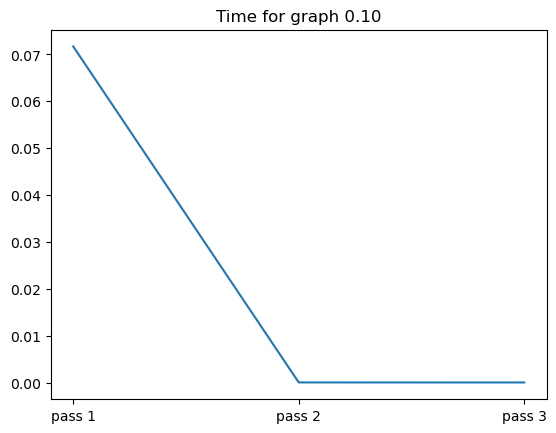




#############################
Performance of algroithm for graph:  0.45
NMI Score: 0.8872114066302271
Modularity: 0.28173828125
            time  modularity
pass 1  0.299377    0.256714
pass 2  0.000465    0.418985
pass 3  0.000073    0.442892
pass 4  0.000068    0.442892


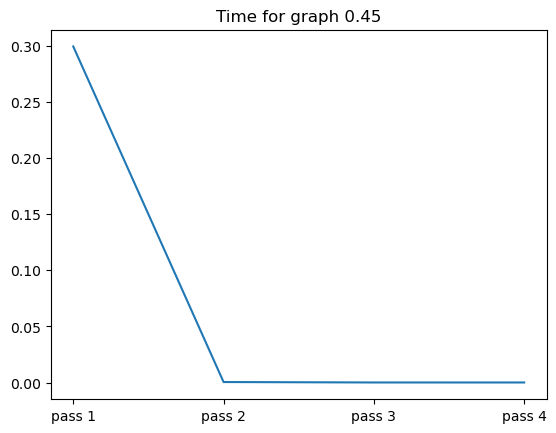




#############################
Performance of algroithm for graph:  0.20
NMI Score: 1.0
Modularity: 0.5546875
            time  modularity
pass 1  0.118402    0.554688
pass 2  0.000086    0.641774
pass 3  0.000071    0.641774


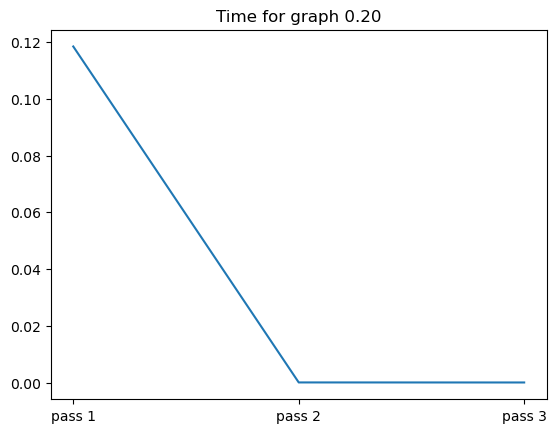

In [6]:
from sklearn.metrics.cluster import normalized_mutual_info_score

graphs = [(G,'test', [0,0,0,0,1,1,1,2,2,2,2,2])]

histories = []
names = []
nmi_scores = []
groundTruths = []
partitions = []
modularities = []
graphs.extend(get_graphs())

graphs.extend(load_synth_graphs())

for graph, name, real_partition in graphs:
    louvain = Louvain()

    start = time.time()
    partition, history = louvain.getBestPartition(graph, verbose=False, plot=False)
    end = time.time()
    p = defaultdict(list)
    for k, v in partition.items():
        p[v].append(k)

    com2node = defaultdict(list)
    for node, com_id in partition.items():
        com2node[com_id].append(node)
    modularities.append(nx.community.modularity(graph, com2node.values()))

    # Calcul de la NMI

    nmi_score = normalized_mutual_info_score(real_partition, [partition[key] for key in sorted(partition.keys())])
    partitions.append(partition)
    histories.append(history)
    names.append(name)
    groundTruths.append(real_partition)
    nmi_scores.append(nmi_score)

for i, history in enumerate(histories):
    print('#############################')
    print('Performance of algroithm for graph: ', names[i])
    print('NMI Score:', nmi_scores[i])
    print('Modularity:', modularities[i])
    
    performance = pd.DataFrame({'time': [his[0] for his in history], 'modularity': [his[1] for his in history]}, index=[f'pass {i+1}' for i in range(len(history))])
    print(performance)

    # plotting times
    plt.figure()
    plt.plot(performance['time'])
    plt.title(f'Time for graph {names[i]}')
    plt.show()
    print('\n\n')